<a href="https://colab.research.google.com/github/hrbae/Industrial_Data_Science/blob/main/Code/12-2%20%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%95%B4%EC%9A%B4%EC%9A%B4%EC%9E%84%EC%A7%80%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-12-08 16:51:14--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-12-08 16:51:14 (49.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdriv


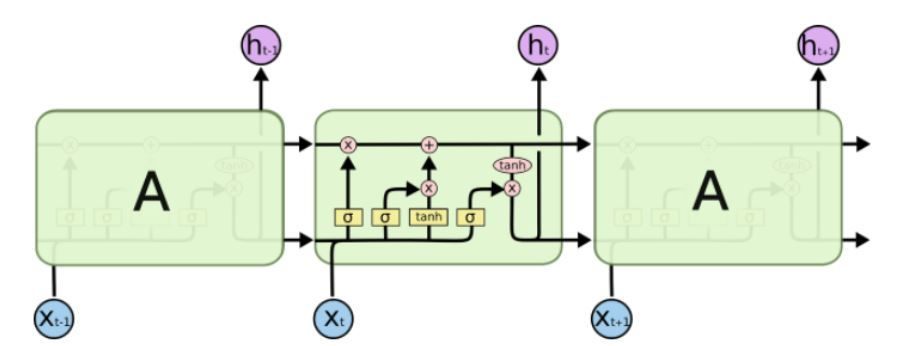

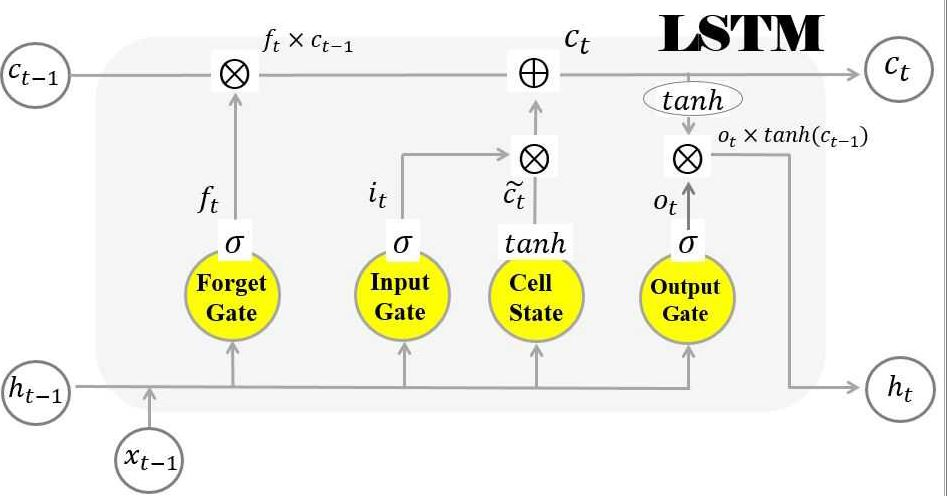

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


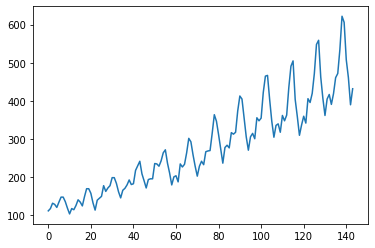

In [ ]:
training_set = pd.read_csv('airline-passengers.csv')
print(training_set.head())
dt = training_set.iloc[:,1:2].values
plt.plot(dt)
plt.show()

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
sc = MinMaxScaler()
dt = sc.fit_transform(dt)
seq_length = 4
x, y = sliding_windows(dt, seq_length)
print(x,y)
print(x.shape)
print(y.shape)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

[[[0.01544402]
  [0.02702703]
  [0.05405405]
  [0.04826255]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]
  [0.03281853]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]
  [0.05984556]]

 [[0.04826255]
  [0.03281853]
  [0.05984556]
  [0.08494208]]

 [[0.03281853]
  [0.05984556]
  [0.08494208]
  [0.08494208]]

 [[0.05984556]
  [0.08494208]
  [0.08494208]
  [0.06177606]]

 [[0.08494208]
  [0.08494208]
  [0.06177606]
  [0.02895753]]

 [[0.08494208]
  [0.06177606]
  [0.02895753]
  [0.        ]]

 [[0.06177606]
  [0.02895753]
  [0.        ]
  [0.02702703]]

 [[0.02895753]
  [0.        ]
  [0.02702703]
  [0.02123552]]

 [[0.        ]
  [0.02702703]
  [0.02123552]
  [0.04247104]]

 [[0.02702703]
  [0.02123552]
  [0.04247104]
  [0.07142857]]

 [[0.02123552]
  [0.04247104]
  [0.07142857]
  [0.05984556]]

 [[0.04247104]
  [0.07142857]
  [0.05984556]
  [0.04054054]]

 [[0.07142857]
  [0.05984556]
  [0.04054054]
  [0.08687259]]

 [[0.05984556]
  [0.04054054]
  [0.08687259]
  [0.12741313]]

 [[0.040

In [ ]:
class LSTM(nn.Module):

    def __init__(self, output, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.output = output
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, output)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

output = 1

lstm = LSTM(output, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.06235
Epoch: 100, loss: 0.00337
Epoch: 200, loss: 0.00300
Epoch: 300, loss: 0.00263
Epoch: 400, loss: 0.00227
Epoch: 500, loss: 0.00201
Epoch: 600, loss: 0.00185
Epoch: 700, loss: 0.00178
Epoch: 800, loss: 0.00176
Epoch: 900, loss: 0.00175
Epoch: 1000, loss: 0.00174
Epoch: 1100, loss: 0.00173
Epoch: 1200, loss: 0.00173
Epoch: 1300, loss: 0.00172
Epoch: 1400, loss: 0.00172
Epoch: 1500, loss: 0.00171
Epoch: 1600, loss: 0.00171
Epoch: 1700, loss: 0.00171
Epoch: 1800, loss: 0.00170
Epoch: 1900, loss: 0.00170


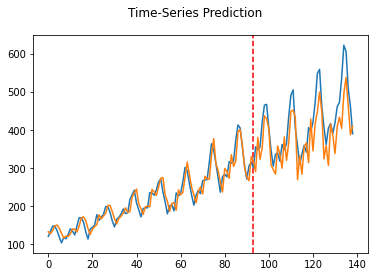

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [ ]:
data_path = '/content/gdriv/My Drive/Colab Notebooks'
bdi = pd.read_csv(data_path+'/Data/bdi.csv')
bdi = bdi.iloc[3000:,:]
bdi.head()

,date,bdi
3000,2011-Oct-31,1965
3001,2011-Nov-01,1912
3002,2011-Nov-02,1859
3003,2011-Nov-03,1817
3004,2011-Nov-04,1784


In [ ]:
dt = bdi.iloc[:,1:2].values
print(dt.shape)
dt = bdi.iloc[:,1].values
print(dt.shape)


(1567, 1)
(1567,)


In [ ]:
sc = MinMaxScaler()
dt = sc.fit_transform(dt)

seq_length = 90
x, y = sliding_windows(dt, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

ValueError: ignored

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
output = 1

lstm = LSTM(output, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 1.49630
Epoch: 100, loss: 0.02879
Epoch: 200, loss: 0.00198
Epoch: 300, loss: 0.00130
Epoch: 400, loss: 0.00099
Epoch: 500, loss: 0.00080
Epoch: 600, loss: 0.00066
Epoch: 700, loss: 0.00056
Epoch: 800, loss: 0.00049
Epoch: 900, loss: 0.00043
Epoch: 1000, loss: 0.00038
Epoch: 1100, loss: 0.00034
Epoch: 1200, loss: 0.00031
Epoch: 1300, loss: 0.00029
Epoch: 1400, loss: 0.00026
Epoch: 1500, loss: 0.00025
Epoch: 1600, loss: 0.00023
Epoch: 1700, loss: 0.00021
Epoch: 1800, loss: 0.00020
Epoch: 1900, loss: 0.00019


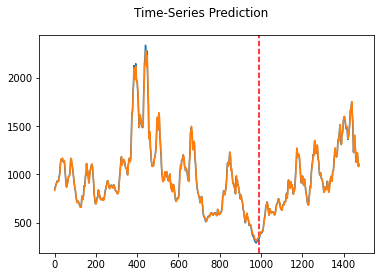

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()